# Players Stats -- Data Cleaning and EDA
Pierre-Antoine MAHE -- June 2020

## Table of Contents

* [Introduction](#introduction)
* [Loading Data](#loading)
* [Data Points in Players DB](#datapoints)
* [Data description](#description)
* [Null Values](#null)
* [EDA](#eda)

## 1. Introduction <a name='introduction'></a>

## 2. Loading Data<a name="loading"></a>

In [1]:
# Data Wrangling
import numpy as np
import pandas as pd

# DB connection
import sqlite3

# Plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
conn = sqlite3.connect('../../CSGOscraper/data/hltv.db')
players_df = pd.read_sql("""SELECT * FROM players_stats""", conn)
players_df.head()

,player_ref,player_name,rating_1,rating_2,impact,deaths_per_round,kast,average_damage_per_round,kills_per_round,total_kills,...,opening_kill_ratio,team_win_percent_after_first_kill,first_kill_in_won_rounds,rifle_kills,sniper_kills,smg_kills,pistol_kills,grenade_kills,other_kills,maps_won
0,11893,ZywOo,1.29,1.35,1.50,0.62,0.748,90.4,0.87,14311,...,1.60,0.731,0.220,5107,5306,788,2851,165,116,0.606
1,39,GeT_RiGhT,1.10,NaN,1.03,0.64,0.691,76.8,0.74,32012,...,1.08,0.762,0.140,23226,878,2125,4816,443,541,0.616
2,13281,El1an,1.10,1.13,1.19,0.64,0.689,76.3,0.74,11540,...,1.44,0.721,0.196,2077,7076,234,2025,72,70,0.458
3,5021,swag,1.10,NaN,1.09,0.62,0.729,77.6,0.73,10527,...,1.20,0.757,0.136,6649,1365,447,1847,171,69,0.606
4,1378,zehN,1.10,NaN,1.13,0.65,0.716,80.9,0.74,16421,...,1.07,0.761,0.131,11566,471,1285,2698,355,61,0.586


In [3]:
players_df.shape

(721, 39)

The dataframe shape is as expected, in the next part we will talk a bit more about the available datapoints.

## 3. Datapoints in Players DB <a name='datapoints'></a>

There are quite a few datapoints in the players statistics database, since we build the scraper we can already give a short explanation for each one.

This can also be found in the players_stats.md file (WIP)

### Player Metadata


* **player_ref** : reference number of the player on the hltv website.
* **player_name** : player's pseudonym.


* **rating_1** : a number computed by hltv "telling us if the player put up above or below average numbers, with 1.00 being the average.
* **rating_2** : improvement on rating_1 (see https://www.hltv.org/news/20695/introducing-rating-20 for details). Computed for 2016 and onward data. Cannot be computed for players with registered stats before 2016.
* **impact** : another hltv metric that measures the impact made from multikills, opening kills, and clutches.

--------------------------------------------------------------------------------

### Overall Statistics


* **maps_played** : total number of played maps recorded.
* **maps_won** : total number of recorded maps won.
* **rounds_played** : total number of played rounds recorded.
* **round_with_kills** : total number of rounds when the player had at least a kill.


* **total_kills** : total number of kills recorded.
* **total_deaths** : total number of deaths recorded.
* **kill_death_difference** : difference between **total_kills** and **total_deaths**.
* **kd_ratio** : ratio of **total_kills** and **total_deaths**.


* **rounds_X_kill**: number of rounds when the player had X (0, 1, 2, 3, 4 or 5) kills.


* **total_opening_kills** : total number of opening kills (the player was the first of all 10 players to kill an enemy during the round).
* **total_opening_deaths** : total number of opening deaths (the player was the first of all 10 players to die).
* **opening_kill_ratio** : ratio of the last two statistics.

--------------------------------------------------------------------------------

### Average Statistics


* **kills_per_round** : ratio of **total_kills** over **rounds_played**.
* **deaths_per_round** : ratio of **total_deaths** over **rounds_played**.
* **assists_per_round** : number of assists per round. To get an assist, the player need to do at least 41 damage (out of100), then the enemy needs to die. This doesn't take into account flash assists or else, only damage.


* **average_damage_per_round** : average damage dealt by the player per round.
* **grenade_damage_per_round** : average damage dealt by the player per round with grenades.
* **headshot_percent** : number of kills where the last bullet was a headshot.
* **kast** : percentage of rounds in which the player either had a kill, assist, survived or was traded.

--------------------------------------------------------------------------------

### Specific Statistics


* **team_win_percent_after_first_kill**: percentage of rounds won by the player's team after the player took the first kill
* **first_kill_in_won_rounds**: percentage of rounds where the player took the first kill and the player's team won


* **saved_by_teammate_per_round** : number of times the player has been saved by a teammate per round (to save a teammate you need to kill the attacker that was damaging an ally within 1 seconds of his last attack). Data from 2016 and onward only.
* **saved_a_teammate_per_round** : number of times the player has saved a teammate per round. Data from 2016 and onward only.

--------------------------------------------------------------------------------

### Weapon Statistics


* **weapons_kills** : numbers of kills performed with the specified weapon (rifle, sniper, smg, pistol, grenade or other).

## 4. Data description <a name='description'></a>

Verifying that the datapoints types are similar to what was present in the SQL database.

In [4]:
players_df.dtypes

player_ref                            object
player_name                           object
rating_1                             float64
rating_2                             float64
impact                               float64
deaths_per_round                     float64
kast                                 float64
average_damage_per_round             float64
kills_per_round                      float64
total_kills                            int64
total_deaths                           int64
headshot_percent                     float64
kd_ratio                             float64
grenade_damage_per_round             float64
maps_played                            int64
rounds_played                          int64
assists_per_round                    float64
saved_by_teammate_per_round          float64
saved_a_teammate_per_round           float64
rounds_with_kills                      int64
kill_death_difference                  int64
rounds_0_kill                          int64
rounds_1_k

In [5]:
players_df.describe()

,rating_1,rating_2,impact,deaths_per_round,kast,average_damage_per_round,kills_per_round,total_kills,total_deaths,headshot_percent,...,opening_kill_ratio,team_win_percent_after_first_kill,first_kill_in_won_rounds,rifle_kills,sniper_kills,smg_kills,pistol_kills,grenade_kills,other_kills,maps_won
count,721.000000,227.000000,720.000000,721.000000,720.000000,720.000000,721.000000,721.000000,721.000000,721.000000,...,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,1.014674,1.080925,1.061556,0.670111,0.700724,75.514583,0.693232,12460.791956,11938.296810,0.449882,...,1.057226,0.735305,0.146975,7662.865465,1674.026352,714.080444,2213.313454,155.564494,60.638003,0.538828
std,0.069346,0.064981,0.107689,0.029561,0.019436,4.476596,0.046490,6501.890991,6008.779949,0.079619,...,0.183867,0.020790,0.026901,4679.535372,2644.784919,420.768591,1155.272656,104.885197,75.136399,0.059755
min,0.770000,0.840000,0.470000,0.560000,0.578000,48.500000,0.520000,4192.000000,5051.000000,0.236000,...,0.630000,0.670000,0.069000,1051.000000,7.000000,105.000000,700.000000,27.000000,2.000000,0.367000
25%,0.970000,1.040000,1.000000,0.650000,0.688750,72.900000,0.670000,7184.000000,7221.000000,0.405000,...,0.940000,0.722000,0.129000,4296.000000,166.000000,403.000000,1301.000000,79.000000,20.000000,0.498000
50%,1.010000,1.080000,1.060000,0.670000,0.701000,75.600000,0.690000,10679.000000,10311.000000,0.466000,...,1.020000,0.735000,0.144000,6401.000000,481.000000,615.000000,1899.000000,125.000000,39.000000,0.541000
75%,1.060000,1.120000,1.130000,0.690000,0.714000,78.300000,0.720000,15196.000000,14676.000000,0.507000,...,1.150000,0.749000,0.164000,9837.000000,1913.000000,934.000000,2733.000000,195.000000,72.000000,0.578000
max,1.290000,1.350000,1.500000,0.750000,0.761000,92.200000,0.870000,34339.000000,32342.000000,0.685000,...,1.950000,0.819000,0.264000,24335.000000,17977.000000,2615.000000,6934.000000,839.000000,961.000000,0.745000


First obvious observation : <p>**rating_2 as only 227 values**. This is explained above, rating_2 can't be accurately computed for players with recorded stats before 2016. It was scraped to be thorough but **we can drop it** for our analysis, **rating_1** is still a good **"ground_truth" for a player quality**.</p>

In [6]:
players_df.drop('rating_2', axis=1, inplace=True)

## 5. Null Values <a name='null'></a>

We can also see that some columns have 720 values out of 721. This shows the existence of some NULL values.

In [7]:
players_df.isnull().sum()

player_ref                           0
player_name                          0
rating_1                             0
impact                               1
deaths_per_round                     0
kast                                 1
average_damage_per_round             1
kills_per_round                      0
total_kills                          0
total_deaths                         0
headshot_percent                     0
kd_ratio                             0
grenade_damage_per_round             1
maps_played                          0
rounds_played                        0
assists_per_round                    0
saved_by_teammate_per_round          1
saved_a_teammate_per_round           1
rounds_with_kills                    0
kill_death_difference                0
rounds_0_kill                        0
rounds_1_kill                        0
rounds_2_kill                        0
rounds_3_kill                        0
rounds_4_kill                        0
rounds_5_kill            

In [8]:
players_df[players_df.isnull().any(axis=1)]

,player_ref,player_name,rating_1,impact,deaths_per_round,kast,average_damage_per_round,kills_per_round,total_kills,total_deaths,...,opening_kill_ratio,team_win_percent_after_first_kill,first_kill_in_won_rounds,rifle_kills,sniper_kills,smg_kills,pistol_kills,grenade_kills,other_kills,maps_won
120,7147,Fifflaren,0.94,NaN,0.6,NaN,NaN,0.6,7873,7916,...,1.17,0.819,0.132,4741,1355,187,1386,188,16,0.745


**Only one row** contains NULL values, for a player called Fifflaren. That makes sense as he didn't played profesionaly since 2014 (<https://www.hltv.org/player/7147/Fifflaren#tab-matchesBox>).

In [9]:
players_df.drop(120, inplace=True)
players_df.reset_index(inplace=True)

In [10]:
players_df[players_df.isnull().any(axis=1)]

,index,player_ref,player_name,rating_1,impact,deaths_per_round,kast,average_damage_per_round,kills_per_round,total_kills,...,opening_kill_ratio,team_win_percent_after_first_kill,first_kill_in_won_rounds,rifle_kills,sniper_kills,smg_kills,pistol_kills,grenade_kills,other_kills,maps_won


## 6. Exploratory Data Analysis <a name='eda'></a>

In [11]:
players_df.columns

Index(['index', 'player_ref', 'player_name', 'rating_1', 'impact',
       'deaths_per_round', 'kast', 'average_damage_per_round',
       'kills_per_round', 'total_kills', 'total_deaths', 'headshot_percent',
       'kd_ratio', 'grenade_damage_per_round', 'maps_played', 'rounds_played',
       'assists_per_round', 'saved_by_teammate_per_round',
       'saved_a_teammate_per_round', 'rounds_with_kills',
       'kill_death_difference', 'rounds_0_kill', 'rounds_1_kill',
       'rounds_2_kill', 'rounds_3_kill', 'rounds_4_kill', 'rounds_5_kill',
       'total_opening_kills', 'total_opening_deaths', 'opening_kill_ratio',
       'team_win_percent_after_first_kill', 'first_kill_in_won_rounds',
       'rifle_kills', 'sniper_kills', 'smg_kills', 'pistol_kills',
       'grenade_kills', 'other_kills', 'maps_won'],
      dtype='object')

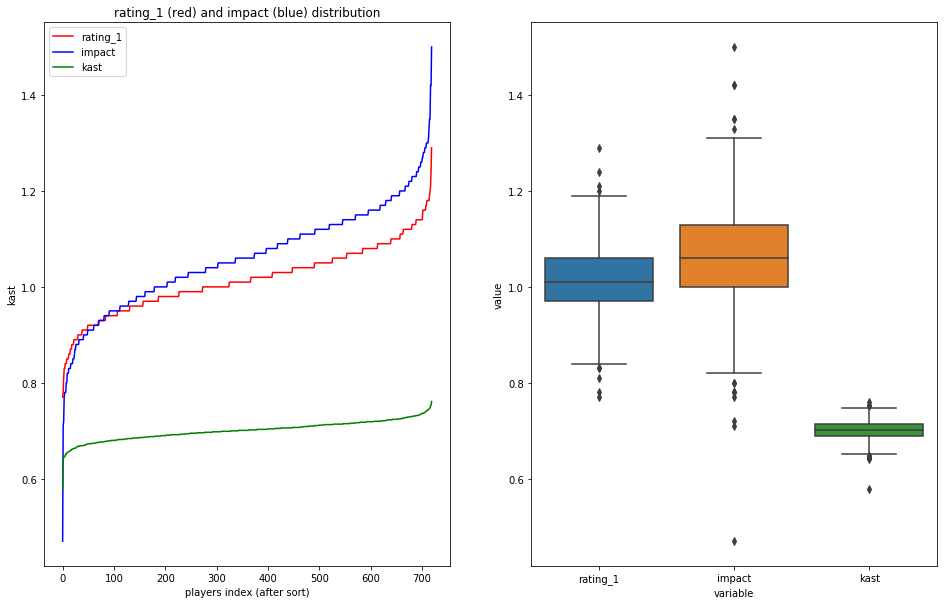

In [25]:
fig = plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(121)
ax1.set_ylabel('values')
ax1.set_xlabel('players index (after sort)')
ax1.set_title('rating_1 (red) and impact (blue) distribution')


names_and_ratings = players_df[['player_name','rating_1']].copy()
names_and_ratings.sort_values(by=['rating_1'], inplace=True)
names_and_impacts = players_df[['player_name','impact']].copy()
names_and_impacts.sort_values(by=['impact'], inplace=True)
names_and_kasts = players_df[['player_name','kast']].copy()
names_and_kasts.sort_values(by=['kast'], inplace=True)
x = np.arange(0, names_and_ratings.shape[0])

sns.lineplot(x, names_and_ratings['rating_1'], color='red')
sns.lineplot(x, names_and_impacts['impact'], color='blue')
sns.lineplot(x, names_and_kasts['kast'], color='green')
ax1.legend(['rating_1', 'impact', 'kast'])

ax2 = fig.add_subplot(122)
ax2 = sns.boxplot(x="variable", y="value", data=pd.melt(players_df[['rating_1', 'impact', 'kast']]))


In [ ]:
As we can see from those plots, rating_1 and impact